<a href="https://colab.research.google.com/github/jigjid/github_task/blob/main/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
import matplotlib.colors
import pickle as pkl

#**Logistic regression scratch**

In [ ]:
class ScratchLogisticRegression():
    def __init__(self, num_iter, lr, bias, verbose,lam):
        self.num_iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.lam = lam
        self.theta = np.array([])
        self.loss = np.array([])
        self.val_loss = np.array([])



    """-----------------------------
      Problem 1: Assumption function
    ------------------------------"""

    def _sigmoid(self,y):
        return 1 / (1 + np.exp(-y))

    def _logistic_hypothesis(self, X):
        pred = X @ self.theta
        pred = self._sigmoid(pred)
        return pred


    """-----------------------------
      Problem 2: Steepest descent method
    ------------------------------"""

    def _gradient_descent(self, X, y):
        m = X.shape[0]
        n = X.shape[1]
        pred = self._logistic_hypothesis(X)
        for j in range(n):
            gradient = 0
            for i in range(m):
                gradient += (pred[i] - y[i]) * X[i, j]
            self.theta[j] = self.theta[j] - self.lr * ((gradient+self.lam*self.theta[j]) / m)



    """-----------------------------
      Problem 3: Estimation
    ------------------------------"""

    def predict_proba(self, X):
        if self.bias == True:
          a = np.ones(X.shape[0]).reshape(X.shape[0], 1)
          X = np.hstack([a, X])
        pred = self._logistic_hypothesis(X)
        return pred


    def predict(self, X):
        if self.bias == True:
            a = np.ones(X.shape[0]).reshape(X.shape[0], 1)
            X = np.hstack([a, X])
        return  np.where(self._logistic_hypothesis(X) >= 0.5,1,0)

    
    """-----------------------------
      Problem 4: Objective function
    ------------------------------"""

    def _loss_func(self, pred, y):
        error = 0
        for i in range(y.shape[0]):
            error += -np.sum(y[i] *  np.log(pred[i])+(1-y[i]) *  np.log(1-pred[i]))
        loss = error / (y.shape[0])
        loss = loss + np.sum(self.theta**2)*self.lam/(2 * y.shape[0])
        return loss







    def fit(self, X, y, X_val=None, y_val=None): 
        if self.bias == True:
		        bias = np.ones((X.shape[0], 1))
		        X = np.hstack((bias, X))
		        bias = np.ones((X_val.shape[0], 1))
		        X_val = np.hstack((bias, X_val))
        self.theta = np.zeros(X.shape[1])
        self.theta = self.theta.reshape(X.shape[1], 1)
        for i in range(self.num_iter):
            pred = self._logistic_hypothesis(X)
            pred_val = self._logistic_hypothesis(X_val)
            self._gradient_descent(X, y)
            loss = self._loss_func(pred, y)
            self.loss = np.append(self.loss, loss)
            loss_val = self._loss_func(pred_val, y_val)
            self.val_loss = np.append(self.val_loss, loss_val)
            
            if self.verbose == True:
                print('{}the loss of learning the first time is {}'.format(i,loss))
         


In [ ]:
def decision_region(X,y,slr):
    mesh_f0, mesh_f1  = np.meshgrid(
        np.arange(np.min(X[:,0]), np.max(X[:,0]), 0.01), 
        np.arange(np.min(X[:,1]), np.max(X[:,1]), 0.01)
    )
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    print("mesh shape:{}".format(mesh.shape))
    y_pred = slr.predict(mesh).reshape(mesh_f0.shape)
    plt.title('decision region')
    plt.xlabel('feature0')
    plt.ylabel('feature1')
    plt.contourf(mesh_f0, mesh_f1, y_pred,cmap=matplotlib.colors.ListedColormap(['pink', 'skyblue']))
    plt.contour(mesh_f0, mesh_f1, y_pred,colors='red')
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1],label='0')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1],label='1')
    plt.legend()
    plt.show()

#**Verification**

###**Problem 5: Learning and estimation**

In [ ]:
iris = load_iris()
X = iris.data[:100,:]
y = iris.target[:100]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


slr = ScratchLogisticRegression(num_iter=100, lr=0.1, bias=True, verbose=True, lam=0.1)
slr.fit(X_train, y_train, X_test, y_test)
pred = slr.predict(X_test)
print(pred.shape)
acc = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)

print("Scratch logistic regression: Accuracy - {}, Precision - {}, Recall - {}".format(acc, precision, recall))

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

pred = log_reg.predict(X_test)
acc = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
print("logistic regression: Accuracy - {}, Precision - {}, Recall - {}".format(acc, precision, recall))

0the loss of learning the first time is 0.6931516443666398
1the loss of learning the first time is 0.6244475339679191
2the loss of learning the first time is 0.5657338793416352
3the loss of learning the first time is 0.5154324471091436
4the loss of learning the first time is 0.47217083101294816
5the loss of learning the first time is 0.4347858572851285
6the loss of learning the first time is 0.40230775970313
7the loss of learning the first time is 0.3739358640996475
8the loss of learning the first time is 0.34901236555233944
9the loss of learning the first time is 0.32699766577902983
10the loss of learning the first time is 0.3074487582100008
11the loss of learning the first time is 0.2900010355114283
12the loss of learning the first time is 0.2743533420393862
13the loss of learning the first time is 0.2602558659050301
14the loss of learning the first time is 0.247500408712819
15the loss of learning the first time is 0.23591259552125227
16the loss of learning the first time is 0.225345

###**Problem 6**
**Plot of learning curve**

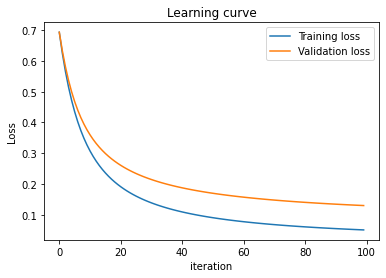

In [ ]:
plt.plot(slr.loss, label = 'Training loss')
plt.plot(slr.val_loss, label = 'Validation loss')
plt.legend()
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.title('Learning curve')
plt.show()

###**Problem 7**
**Visualization of decision area**

0the loss of learning the first time is 0.6931471870719085
1the loss of learning the first time is 0.6921267909022221
2the loss of learning the first time is 0.6911840270467304
3the loss of learning the first time is 0.6903041601485964
4the loss of learning the first time is 0.6894752840345735
5the loss of learning the first time is 0.6886877800123623
6the loss of learning the first time is 0.6879338780924643
7the loss of learning the first time is 0.6872073019266126
8the loss of learning the first time is 0.6865029816973621
9the loss of learning the first time is 0.685816822075512
10the loss of learning the first time is 0.6851455147521293
11the loss of learning the first time is 0.6844863870200797
12the loss of learning the first time is 0.6838372794920312
13the loss of learning the first time is 0.6831964473570575
14the loss of learning the first time is 0.6825624806476631
15the loss of learning the first time is 0.6819342398571308
16the loss of learning the first time is 0.68131080

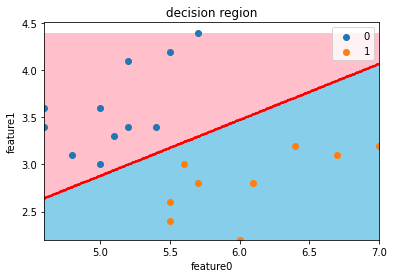

In [ ]:
X = iris.data[:100,:2]
y = iris.target[:100]
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.2)
slr = ScratchLogisticRegression(num_iter=1000, lr=0.01, bias=True,verbose=True,lam = 0.1)
slr.fit(X_train, y_train,X_test,y_test)

decision_region(X_test, y_test, slr)